In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline 

print("Reading data...")
train_file = "train_users_2.csv"
df_train = pd.read_csv(train_file, header = 0,index_col=None)
df_train.head()

Populating the interactive namespace from numpy and matplotlib
Reading data...


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [10]:

test_file = "test_users.csv"
df_test = pd.read_csv(test_file, header = 0,index_col=None)
df_test.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [11]:
# Combining into one dataset for cleaning
df_all = pd.concat((df_train, df_test))
print("Reading data...completed")
df_all.head()

Reading data...completed


,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,20090319043255
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,20090523174809
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,20090609231247
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,20091031060129
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,20091208061105


In [12]:

# Fixing date formats in Pandas - to_datetime
## Change dates to specific format
print("Fixing timestamps...")
df_all['date_account_created'] = pd.to_datetime(df_all['date_account_created'], format='%Y-%m-%d')
df_all['timestamp_first_active'] = pd.to_datetime(df_all['timestamp_first_active'], format='%Y%m%d%H%M%S')
print("Fixing timestamps...completed")

Fixing timestamps...
Fixing timestamps...completed


# #Home Work

In [13]:
df_all.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,2009-03-19 04:32:55
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,2009-05-23 17:48:09
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,2009-06-09 23:12:47
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,2009-10-31 06:01:29
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,2009-12-08 06:11:05


In [14]:

## Removing date_first_booking column
df_all.drop('date_first_booking', axis = 1, inplace = True)
print("Droped date_first_booking column...")

df_all.head()

Droped date_first_booking column...


,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,2009-03-19 04:32:55
1,seo,google,38.0,NDF,2011-05-25,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,2009-05-23 17:48:09
2,direct,direct,56.0,US,2010-09-28,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,2009-06-09 23:12:47
3,direct,direct,42.0,other,2011-12-05,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,2009-10-31 06:01:29
4,direct,direct,41.0,US,2010-09-14,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,2009-12-08 06:11:05


In [15]:
import numpy as np

## Remove outliers function - [1]
def remove_outliers(df, column, min_val, max_val):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values<=min_val, col_values>=max_val), np.NaN, col_values)
    return df

In [16]:
## Fixing age column - [2]
print("Fixing age column...")
df_all = remove_outliers(df = df_all, column = 'age', min_val = 15, max_val = 90)
df_all['age'].fillna(-1, inplace = True)
print("Fixing age column...completed")

Fixing age column...
Fixing age column...completed


/home/swapna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less_equal
  
/home/swapna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater_equal
  


In [11]:
df_all.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,-1.0,NDF,2010-06-28,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,2009-03-19 04:32:55
1,seo,google,38.0,NDF,2011-05-25,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,2009-05-23 17:48:09
2,direct,direct,56.0,US,2010-09-28,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,2009-06-09 23:12:47
3,direct,direct,42.0,other,2011-12-05,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,2009-10-31 06:01:29
4,direct,direct,41.0,US,2010-09-14,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,2009-12-08 06:11:05


In [12]:

# Other column missing value - Fill first_affiliate_tracked column
print("Filling first_affiliate_tracked column...")
df_all['first_affiliate_tracked'].fillna(-1, inplace=True)
print("Filling first_affiliate_tracked column...completed")

df_all.head()

Filling first_affiliate_tracked column...
Filling first_affiliate_tracked column...completed


,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,-1.0,NDF,2010-06-28,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,2009-03-19 04:32:55
1,seo,google,38.0,NDF,2011-05-25,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,2009-05-23 17:48:09
2,direct,direct,56.0,US,2010-09-28,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,2009-06-09 23:12:47
3,direct,direct,42.0,other,2011-12-05,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,2009-10-31 06:01:29
4,direct,direct,41.0,US,2010-09-14,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,2009-12-08 06:11:05


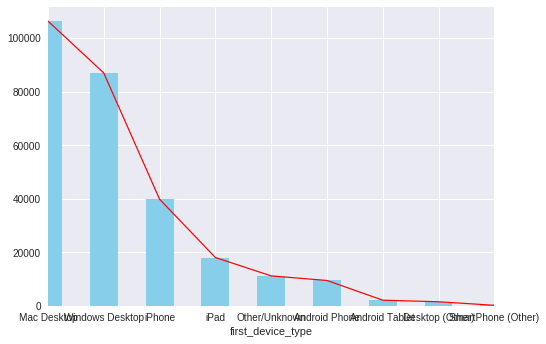

In [17]:
import seaborn as sns
df_all.first_device_type.value_counts(dropna=False).plot(kind='bar', color='skyblue', rot=0)
sns.set_style("whitegrid", {'axes.edgecolor': '0'})
sns.set_context("poster", font_scale=1.1)
df_all.first_device_type.value_counts().plot(kind='line', linewidth=1.2, color='red')
plt.xlabel('first_device_type')
sns.despine()

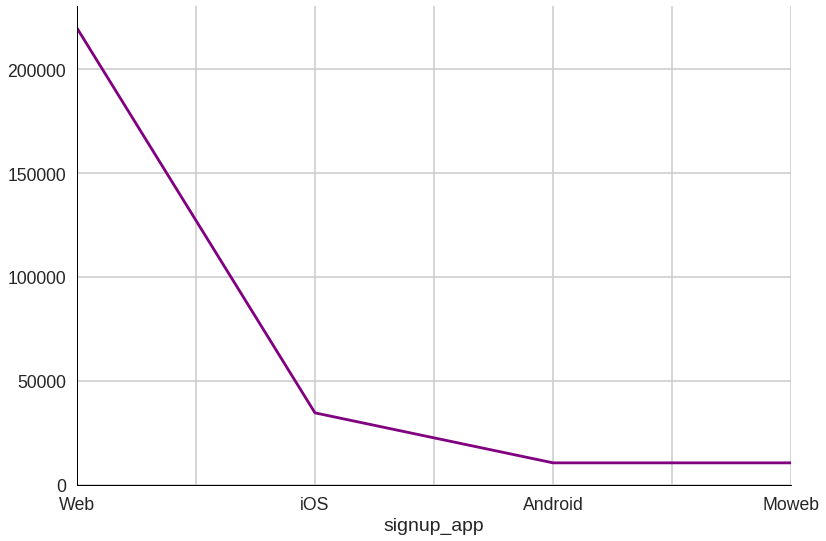

In [18]:
df_all.signup_app.value_counts(dropna=False).plot(kind='line', color='purple', rot=0)
plt.xlabel('signup_app')
sns.despine()

In [19]:
import numpy as np
col_values = df_all['gender'].values
df_all['gender']=np.where(df_all['gender']=="-unknown-",np.NaN,col_values )
#df_all['age'].fillna(NaN,inplace = True)
df_all['gender'].fillna(-1, inplace = True)
df_all.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,-1.0,NDF,2010-06-28,untracked,Chrome,Mac Desktop,-1,gxn3p5htnn,en,Web,0,facebook,2009-03-19 04:32:55
1,seo,google,38.0,NDF,2011-05-25,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,2009-05-23 17:48:09
2,direct,direct,56.0,US,2010-09-28,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,2009-06-09 23:12:47
3,direct,direct,42.0,other,2011-12-05,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,2009-10-31 06:01:29
4,direct,direct,41.0,US,2010-09-14,untracked,Chrome,Mac Desktop,-1,87mebub9p4,en,Web,0,basic,2009-12-08 06:11:05


In [20]:
df_all['gender'] = df_all['gender'].replace('-unknown-', numpy.NaN)
df_all.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,-1.0,NDF,2010-06-28,untracked,Chrome,Mac Desktop,-1,gxn3p5htnn,en,Web,0,facebook,2009-03-19 04:32:55
1,seo,google,38.0,NDF,2011-05-25,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,2009-05-23 17:48:09
2,direct,direct,56.0,US,2010-09-28,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,2009-06-09 23:12:47
3,direct,direct,42.0,other,2011-12-05,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,2009-10-31 06:01:29
4,direct,direct,41.0,US,2010-09-14,untracked,Chrome,Mac Desktop,-1,87mebub9p4,en,Web,0,basic,2009-12-08 06:11:05


In [21]:
#import pandas as pd
#df_1 = pd.read_csv('test_users.csv')
df_all['gender'].replace('-unknown-',np.NaN)
df_all.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,-1.0,NDF,2010-06-28,untracked,Chrome,Mac Desktop,-1,gxn3p5htnn,en,Web,0,facebook,2009-03-19 04:32:55
1,seo,google,38.0,NDF,2011-05-25,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,2009-05-23 17:48:09
2,direct,direct,56.0,US,2010-09-28,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,2009-06-09 23:12:47
3,direct,direct,42.0,other,2011-12-05,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,2009-10-31 06:01:29
4,direct,direct,41.0,US,2010-09-14,untracked,Chrome,Mac Desktop,-1,87mebub9p4,en,Web,0,basic,2009-12-08 06:11:05


In [22]:
len(df_all.index)

275547

In [24]:
df_all.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,-1.0,NDF,2010-06-28,untracked,Chrome,Mac Desktop,-1,gxn3p5htnn,en,Web,0,facebook,2009-03-19 04:32:55
1,seo,google,38.0,NDF,2011-05-25,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,2009-05-23 17:48:09
2,direct,direct,56.0,US,2010-09-28,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,2009-06-09 23:12:47
3,direct,direct,42.0,other,2011-12-05,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,2009-10-31 06:01:29
4,direct,direct,41.0,US,2010-09-14,untracked,Chrome,Mac Desktop,-1,87mebub9p4,en,Web,0,basic,2009-12-08 06:11:05


In [25]:
print(mean(df_all['age']))

19.878463565199404


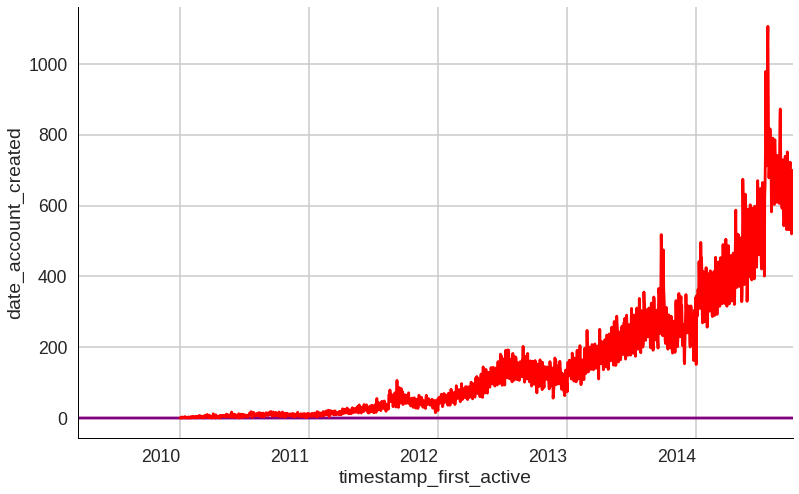

In [26]:
df_all.timestamp_first_active.value_counts(dropna=False).plot(kind='line', color='purple', rot=0)
#sns.set_style("whitegrid", {'axes.edgecolor': '0'})
#sns.set_context("poster", font_scale=1.1)
df_all.date_account_created.value_counts(dropna=False).plot(kind='line', color='red',rot=0)
plt.xlabel('timestamp_first_active')
plt.ylabel('date_account_created')
sns.despine()

In [27]:

## Removing date_first_booking column
df_all.drop('id', axis = 1, inplace = True)
print("Droped ID...")

df_all.head()

Droped ID...


,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,-1.0,NDF,2010-06-28,untracked,Chrome,Mac Desktop,-1,en,Web,0,facebook,2009-03-19 04:32:55
1,seo,google,38.0,NDF,2011-05-25,untracked,Chrome,Mac Desktop,MALE,en,Web,0,facebook,2009-05-23 17:48:09
2,direct,direct,56.0,US,2010-09-28,untracked,IE,Windows Desktop,FEMALE,en,Web,3,basic,2009-06-09 23:12:47
3,direct,direct,42.0,other,2011-12-05,untracked,Firefox,Mac Desktop,FEMALE,en,Web,0,facebook,2009-10-31 06:01:29
4,direct,direct,41.0,US,2010-09-14,untracked,Chrome,Mac Desktop,-1,en,Web,0,basic,2009-12-08 06:11:05


In [30]:
df_all.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,-1.0,NDF,2010-06-28,untracked,Chrome,Mac Desktop,-1,en,Web,0,facebook,2009-03-19 04:32:55
1,seo,google,38.0,NDF,2011-05-25,untracked,Chrome,Mac Desktop,MALE,en,Web,0,facebook,2009-05-23 17:48:09
2,direct,direct,56.0,US,2010-09-28,untracked,IE,Windows Desktop,FEMALE,en,Web,3,basic,2009-06-09 23:12:47
3,direct,direct,42.0,other,2011-12-05,untracked,Firefox,Mac Desktop,FEMALE,en,Web,0,facebook,2009-10-31 06:01:29
4,direct,direct,41.0,US,2010-09-14,untracked,Chrome,Mac Desktop,-1,en,Web,0,basic,2009-12-08 06:11:05


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

train_data = pd.read_csv("train_users_2.csv")
test_data = pd.read_csv("test_users.csv")
df_all = pd.concat((train_data, test_data), ignore_index = True)

def convert_to_binary(df, col_to_convert):
    categories = list(df[col_to_convert].drop_duplicates())
    print(categories)
    for category in categories:
        cat_name = str(category).replace(" ", "_").replace("(", "").replace("/", "_").replace("-", "").lower()
        col_name = col_to_convert[:5] + '_' + cat_name[:10]
        df[col_name] = 0
        df.loc[(df[col_to_convert] == category), col_name] = 1
    return df

print("One Hot Encoding of Categorical Data")
cols_to_convert = ["gender", 'signup_method', 'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser']

for col in cols_to_convert:
    df_all = convert_to_binary(df = df_all, col_to_convert = col)
    df_all.drop(col, axis = 1, inplace = True)
   
print("One Hot Encoding Categorical Data completed")    

One Hot Encoding of Categorical Data
['-unknown-', 'MALE', 'FEMALE', 'OTHER']
['facebook', 'basic', 'google', 'weibo']
[0, 3, 2, 1, 24, 8, 6, 5, 10, 25, 12, 4, 16, 15, 20, 21, 23, 14]
['en', 'fr', 'de', 'es', 'it', 'pt', 'zh', 'ko', 'ja', 'ru', 'pl', 'el', 'sv', 'nl', 'hu', 'da', 'id', 'fi', 'no', 'tr', 'th', 'cs', 'hr', 'ca', 'is', '-unknown-']
['direct', 'seo', 'other', 'sem-non-brand', 'content', 'sem-brand', 'remarketing', 'api']
['direct', 'google', 'other', 'craigslist', 'facebook', 'vast', 'bing', 'meetup', 'facebook-open-graph', 'email-marketing', 'yahoo', 'padmapper', 'gsp', 'wayn', 'naver', 'baidu', 'yandex', 'daum']
['untracked', 'omg', nan, 'linked', 'tracked-other', 'product', 'marketing', 'local ops']
['Web', 'Moweb', 'iOS', 'Android']
['Mac Desktop', 'Windows Desktop', 'iPhone', 'Other/Unknown', 'Desktop (Other)', 'Android Tablet', 'iPad', 'Android Phone', 'SmartPhone (Other)']
['Chrome', 'IE', 'Firefox', 'Safari', '-unknown-', 'Mobile Safari', 'Chrome Mobile', 'RockMelt

In [32]:
df_all.head()

,age,country_destination,date_account_created,date_first_booking,id,timestamp_first_active,gende_unknown,gende_male,gende_female,gende_other,...,first_theworld_b,first_slimbrowse,first_epic,first_stainless,first_googlebot,first_outlook_20,first_icedragon,first_ibrowse,first_nintendo_b,first_uc_browser
0,NaN,NDF,2010-06-28,NaN,gxn3p5htnn,20090319043255,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,38.0,NDF,2011-05-25,NaN,820tgsjxq7,20090523174809,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,56.0,US,2010-09-28,2010-08-02,4ft3gnwmtx,20090609231247,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,42.0,other,2011-12-05,2012-09-08,bjjt8pjhuk,20091031060129,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,41.0,US,2010-09-14,2010-02-18,87mebub9p4,20091208061105,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
